In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../lib/")
sys.path.append("../multi_city_restriction_pol/")
sys.path.append("../optimization/")
sys.path.append("../optimization_result_ana/")
sys.path.append("../pol_est_sim/")
sys.path.append("../multi_city_penetration/")
sys.path.append("../IBTDM_multi_city/")
sys.path.append("../congestion_pricing/")
from datetime import datetime, timezone, timedelta
from matplotlib import ticker
import copy
import time, datetime
import get_opt_trips
import spilt_trips
import subset_merge
import netload_ana
import get_dis_after_policy
import get_trips_distribution
import simu_traffic
import get_OD_after_pol
import sample_trips
import get_dis_after_congestion_pricing
import importlib
importlib.reload(spilt_trips)
importlib.reload(subset_merge)
importlib.reload(netload_ana)
importlib.reload(get_dis_after_policy)
importlib.reload(get_trips_distribution)
importlib.reload(simu_traffic)
importlib.reload(get_OD_after_pol)
importlib.reload(sample_trips)
importlib.reload(get_dis_after_congestion_pricing)
from collections import defaultdict
import random

# Hangzhou
Here we provide the analysis code for the congestion charging effect in Hangzhou, and the analysis logic and code for other cities are exactly the same.

67534
67534
67534


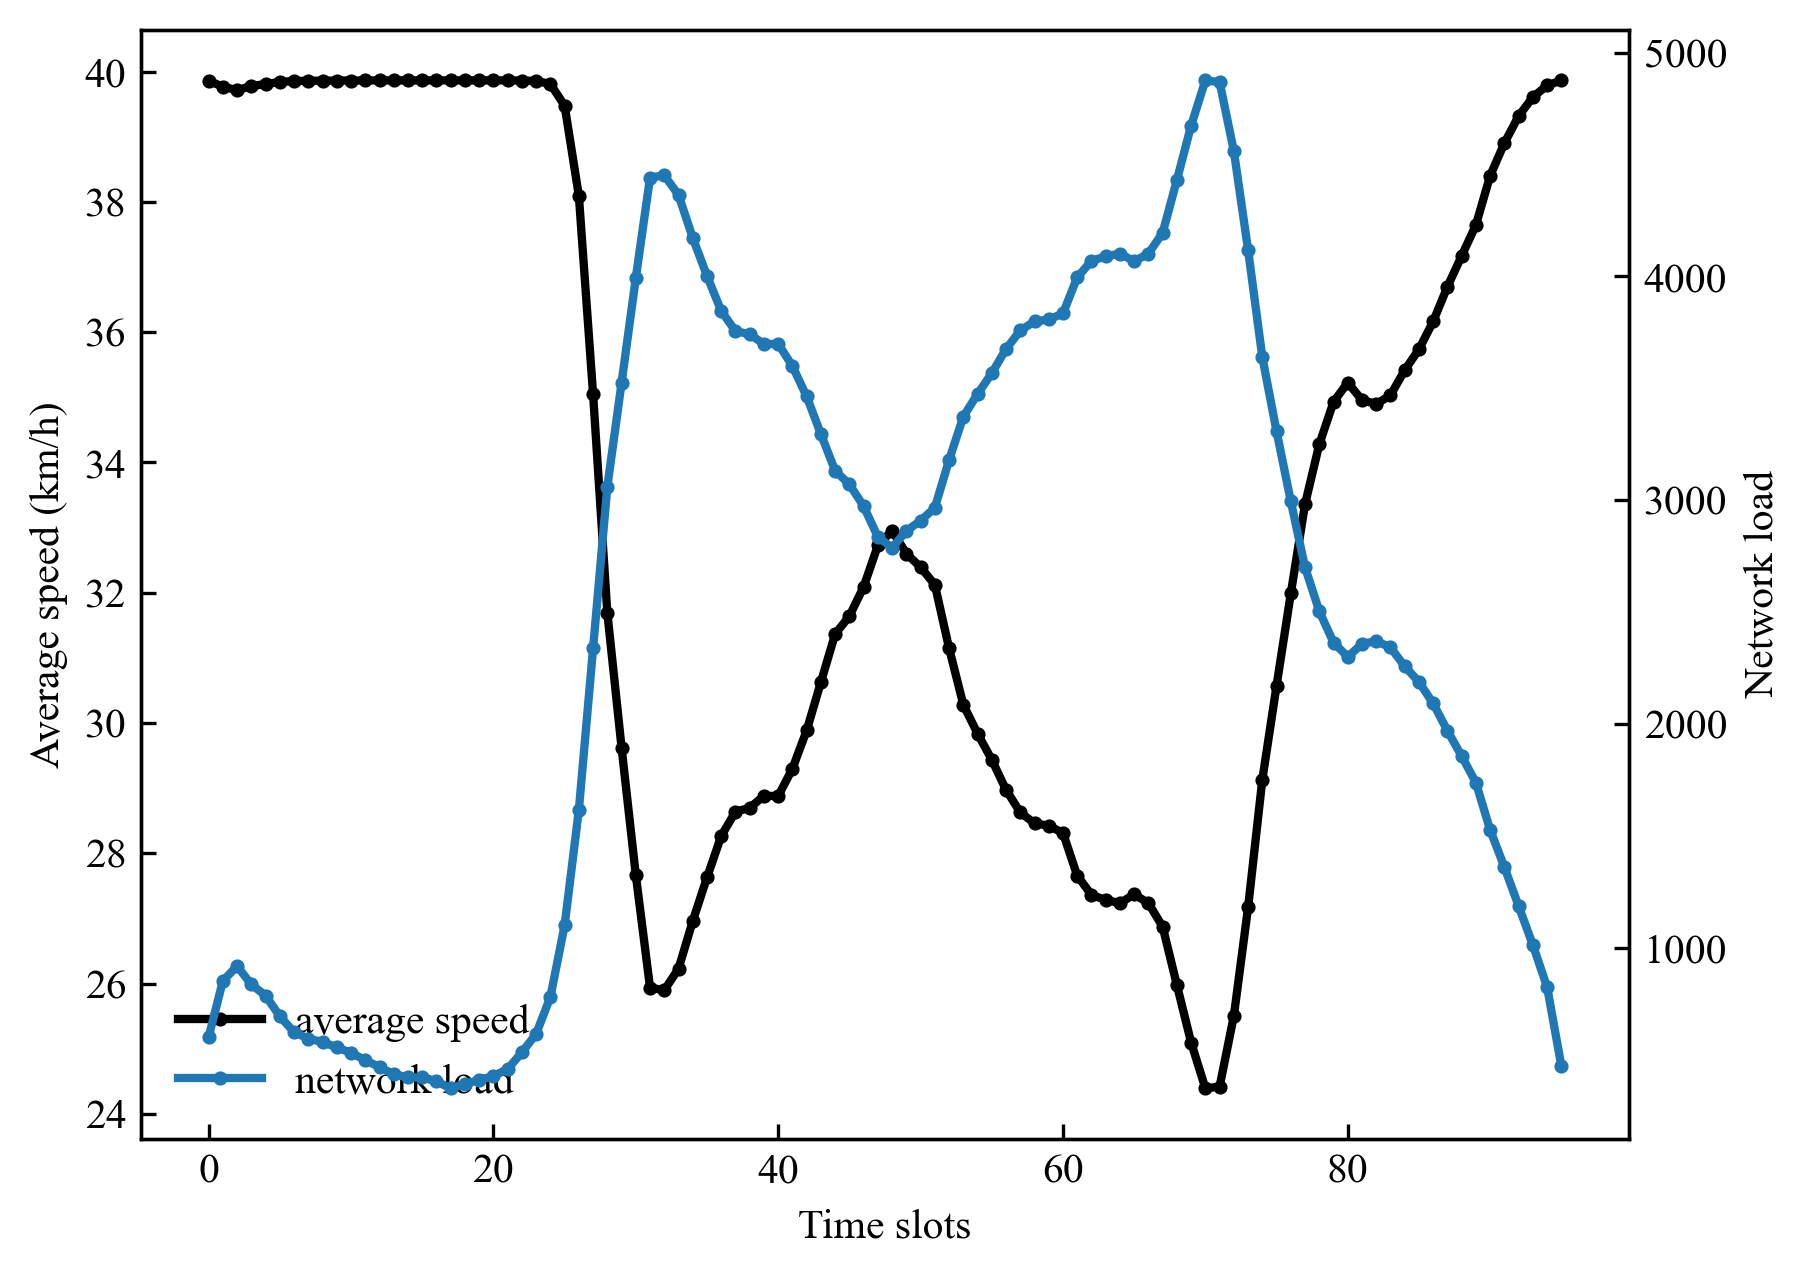

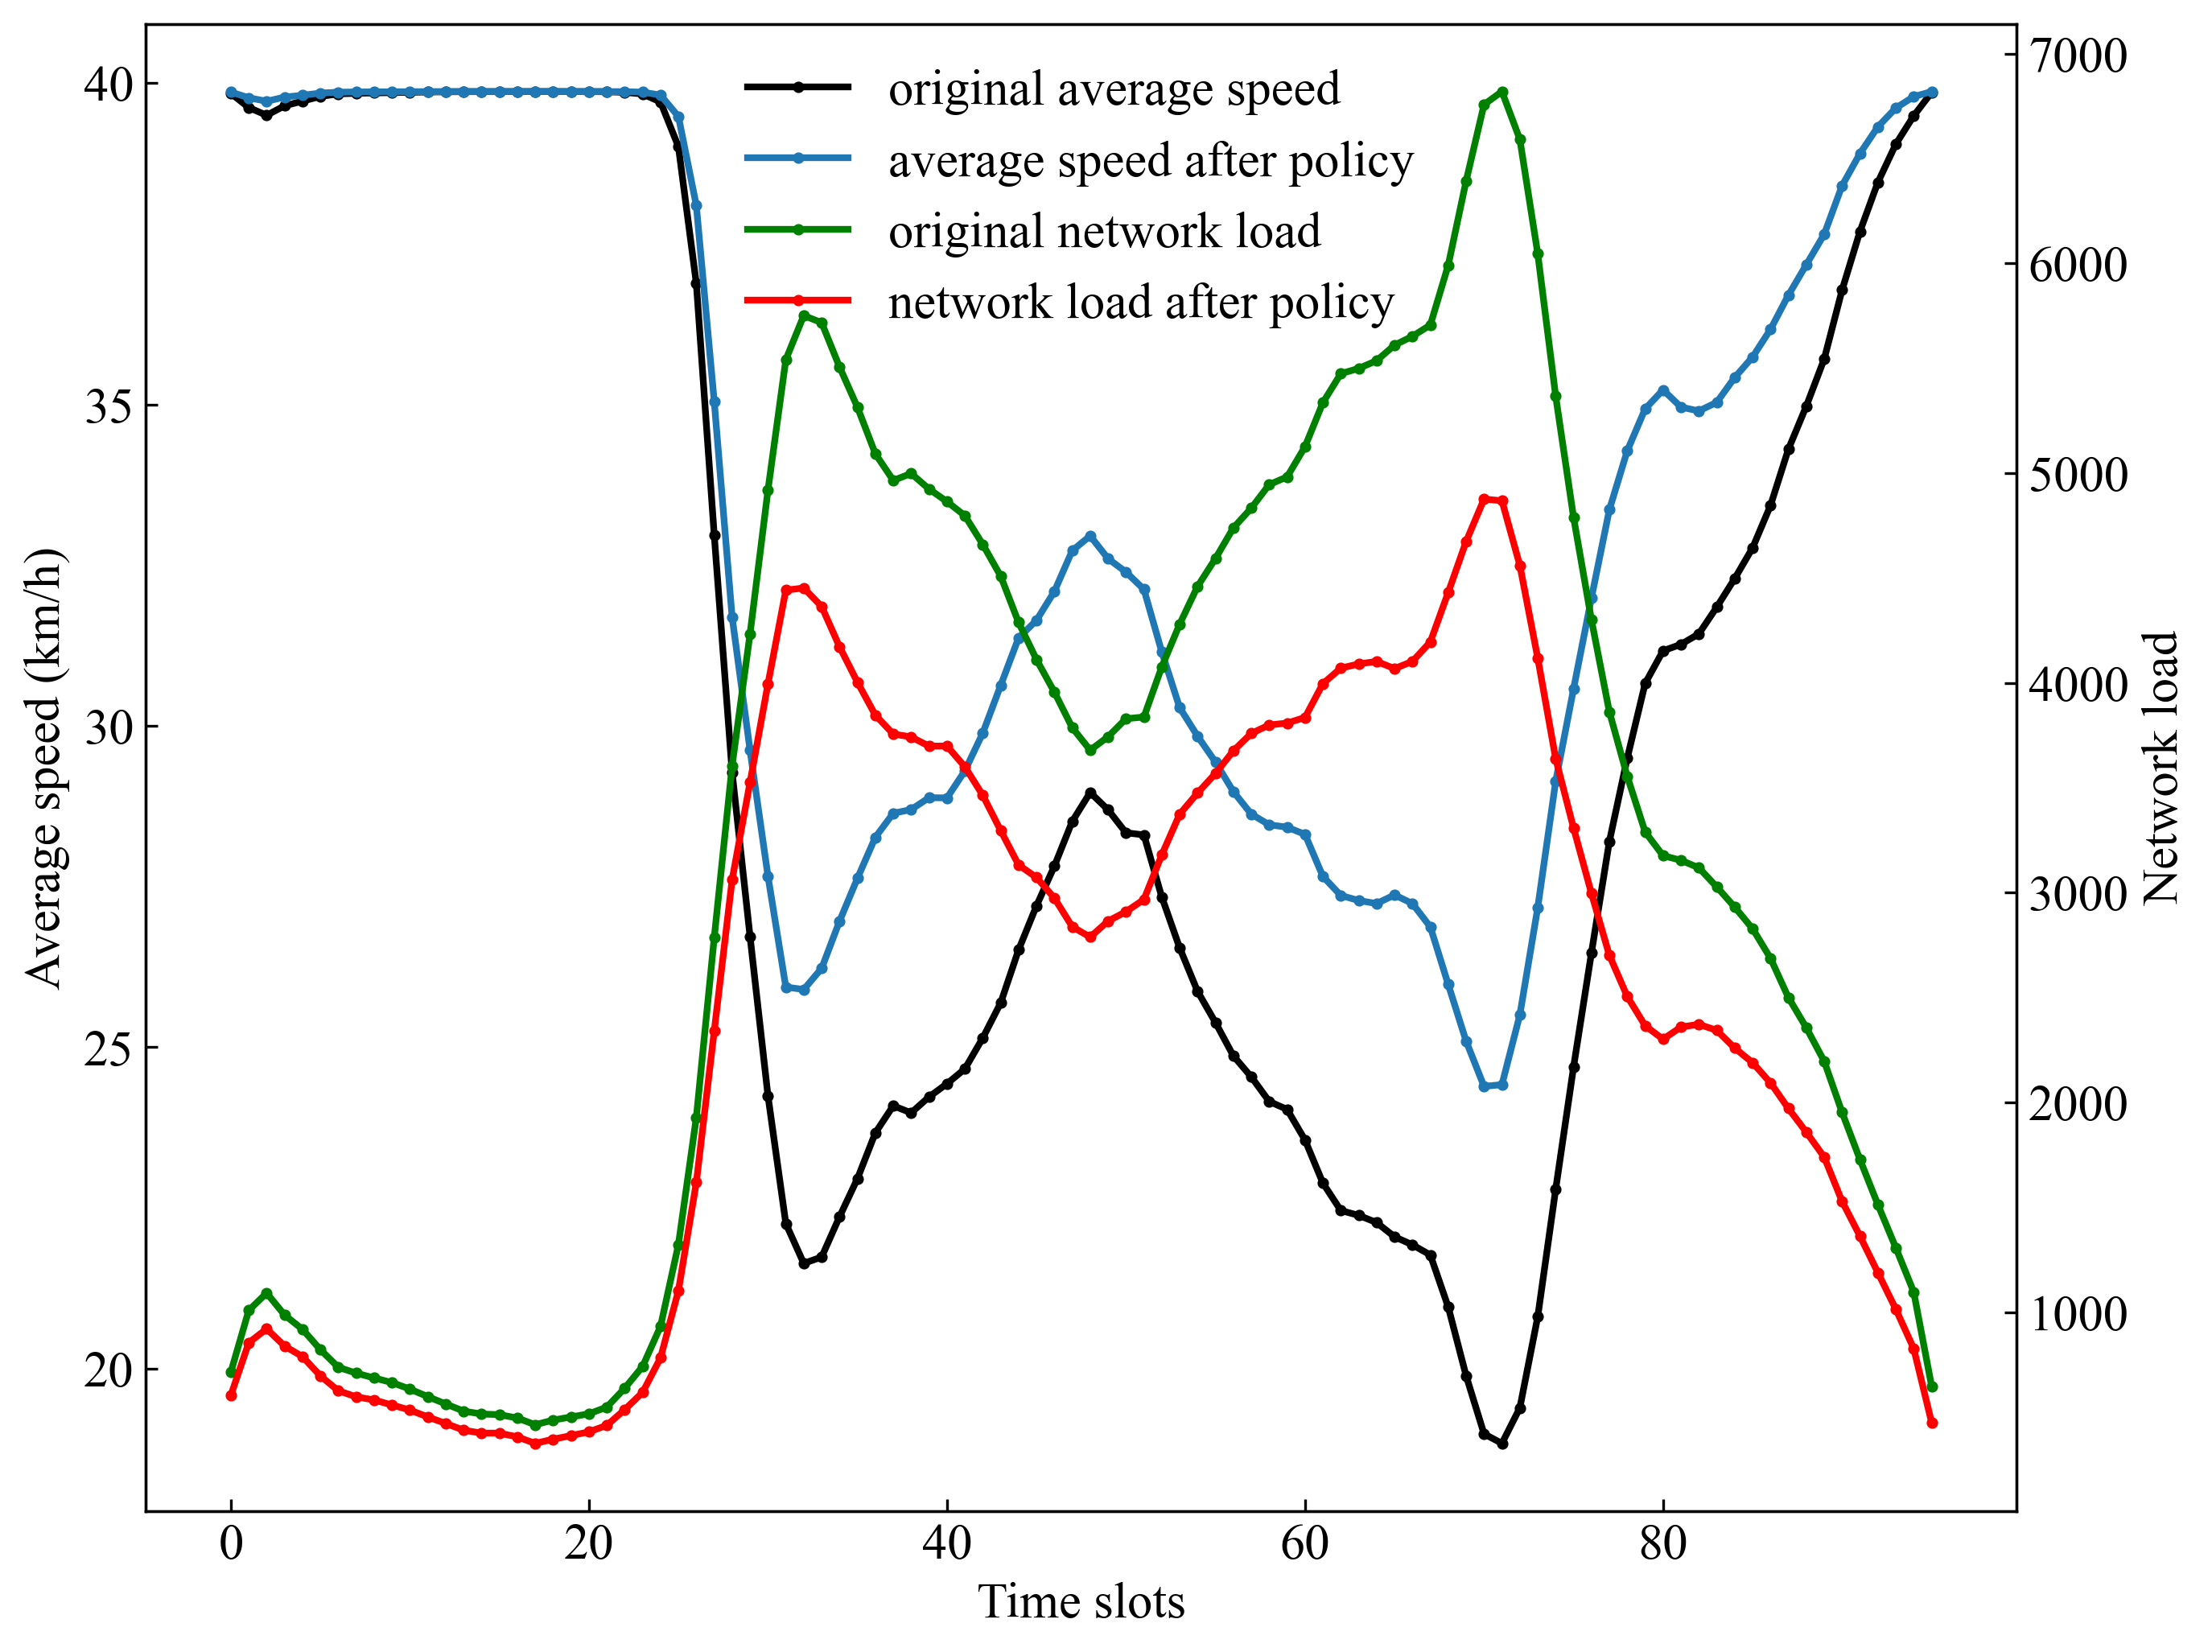

original network load is 6819，network load after policy is 4876，reduced 0.284939140636457


In [2]:
sample_trips.sample.start(OD_file="../../data/ODFile/OD_425_10_percent.csv",ratio = 0.846,
                 data_save_file="../../data/multi_city_congestion_pricing/Hangzhou/OD_sample.csv")
df = get_opt_trips.get_trips.format_convert(OD_file="../../data/multi_city_congestion_pricing/Hangzhou/OD_sample.csv", 
                                    data_save_file="../../data/multi_city_congestion_pricing/Hangzhou/OD_sample_format_convert.csv")
print(len(df))
df.head(2)
get_dis_after_congestion_pricing.trip_dis.get_free_speed_trip_file(
            OD_file_with_free_speed="../../data/simu_pol_eva_data/OD_with_freespeed_0425.csv",
            trip_after_pol="../../data/multi_city_congestion_pricing/Hangzhou/OD_sample_format_convert.csv",
            data_save_file="../../data/multi_city_congestion_pricing/Hangzhou/trip_freespeed_after_pol.csv")
get_trips_distribution.trips_dis.get_distribution(OD_file_free_speed="../../data/multi_city_congestion_pricing/Hangzhou/trip_freespeed_after_pol.csv",
        ts=15,trip_distribution_file="../../data/multi_city_congestion_pricing/Hangzhou/trip_distribution_after_pol.npy")
simu_obj = simu_traffic.simu(trip_dis_file="../../data/multi_city_congestion_pricing/Hangzhou/trip_distribution_after_pol.npy",
               v_n_rela_file="../../data/simu_pol_eva_data/mfdresult_newell.npy",
               free_speed=39.80,ts=15)
simu_obj.traffic_simu()
simu_obj.plot(data_save_file="../../data/multi_city_congestion_pricing/Hangzhou/TrafficStateCP.csv")
# 绘图展示
get_OD_after_pol.get_OD.plot_together(file_after_policy="../../data/multi_city_congestion_pricing/Hangzhou/TrafficStateCP.csv",
                         file_before_policy="../../data/simu_pol_eva_data/SimulationHangzhouTrafficState.csv")